In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_blobs, make_circles
from tqdm import tqdm

In [3]:
def initialization(array):
    parameters = {}
    n = len(array)

    for i in range(1, n):
        parameters['W' + str(i)] = np.random.randn(array[i], array[i-1])
        parameters['b' + str(i)] = np.random.randn(array[i], 1)

    return parameters

In [4]:
def forward_propagation(X, parameters):

    activations = {}

    activations['A0'] = X

    C = len(parameters) // 2

    for i in range(1, C + 1):
        Z = parameters['W' + str(i)].dot(activations['A' + str(i-1)]) + parameters['b' + str(i)]
        activations['A' + str(i)] = 1 / (1 + np.exp(-Z))

    
    return activations

In [5]:
def back_propagation(X, y, activations, parameters):

    gradients = {}

    C = len(parameters) // 2

    m = y.shape[1]

    # Calculate first gradient (beginning from the right)
    dZk = activations['A' + str(C)] - y

    for i in range(1, C + 1)[::-1]:

        gradients['dW' + str(i)] = (1 / m) * dZk.dot(activations['A' + str(i - 1)].T)
        gradients['db' + str(i)] = (1 / m) * np.sum(dZk, axis=1, keepdims=True) # To make sure bk and dbk same dimension
        if i>1:
            dZk = (parameters['W' + str(i)].T).dot(dZk) * activations['A' + str(i-1)] * (1 - activations['A' + str(i-1)])
    
    return gradients

In [6]:
def update(gradients, parameters, learning_rate):

    C = len(parameters) // 2

    for i in range(1, C + 1):
        parameters['W' + str(i)] = parameters['W' + str(i)] - learning_rate*gradients['dW' + str(i)]
        parameters['b' + str(i)] = parameters['b' + str(i)] - learning_rate*gradients['db' + str(i)]

    return parameters

In [7]:
def predict(X, parameters): 

    C = len(parameters) // 2

    activations = forward_propagation(X, parameters)
    A_last = activations['A' + str(C)]
    #print(A_last.shape)
    
    return A_last >= 0.5

In [17]:
def neural_network(X_train, X_test, y_train, y_test, array, learning_rate=0.1, n_iter=1000):

    # Initilization W, b
    n0 = X_train.shape[0]
    print(n0)
    nf = y_train.shape[0]
    print(nf)

    dim = list(array)
    dim.insert(0, n0)
    dim.append(nf)
    print("hidden layers : ", dim)

    parameters = initialization(dim)

    C = len(parameters) // 2
    
    Loss = []
    Loss_test = []
    Accuracy = []
    Accuracy_test = []

    
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X_train, parameters)
        
        if(i % 10 == 0):

            # Train plots
            Loss.append(log_loss(y_train.flatten(), activations['A' + str(C)].flatten()))
            y_pred = predict(X_train, parameters)
            Accuracy.append(accuracy_score(y_pred.flatten(), y_train.flatten()))

            
            # Test plots
            activations2 = forward_propagation(X_test, parameters)
            Loss_test.append(log_loss(y_test.flatten(), activations2['A' + str(C)].flatten()))
            y_pred_test = predict(X_test, parameters)
            Accuracy_test.append(accuracy_score(y_pred_test.flatten(), y_test.flatten()))
            

        gradients = back_propagation(X_train, y_train, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)
        
        
    '''
    # Meshgrid
    x=np.linspace(-1.5,1.5,100)
    y=np.linspace(-1.5,1.5,100)
    xx, yy = np.meshgrid(x, y)
    
    grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
    grid = np.transpose(grid)

    activations = forward_propagation(grid, parameters)
    Z = list(activations['A' + str(C)])
    Z = np.squeeze(Z)
    Z = Z.reshape(xx.shape)
    '''
    


    # Plots 
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.plot(Loss, label="Train Loss")
    plt.plot(Loss_test, label="Test Loss")
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(Accuracy, label="Train Accuracy")
    plt.plot(Accuracy_test, label="Test Accuracy")
    plt.legend()

    '''
    plt.subplot(1,3,3)
    plt.contour(xx,yy, Z, levels=[0.5], colors="k", linewidths=2)
    plt.scatter(X_train[0, :], X_train[1, :], c=y_train, cmap='cool')
    '''

    plt.tight_layout()
    plt.show()
    
    return parameters

X dimensions :  (2, 100)
y dimensions :  (1, 100)


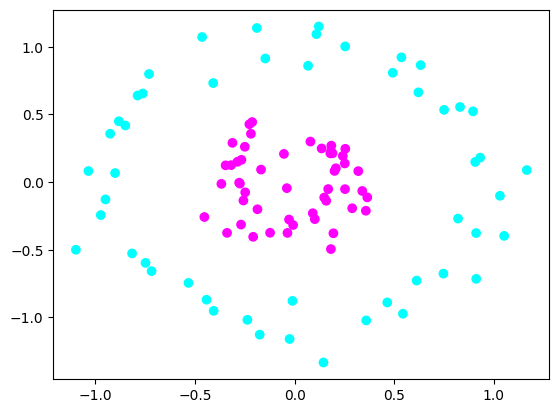

In [ ]:
# Learning decision boundary of set of points

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print("X dimensions : ", X.shape)
print("y dimensions : ", y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='cool')
plt.show()



2
1
hidden layers :  [2, 32, 32, 32, 1]


100%|██████████| 1000/1000 [00:00<00:00, 1565.25it/s]


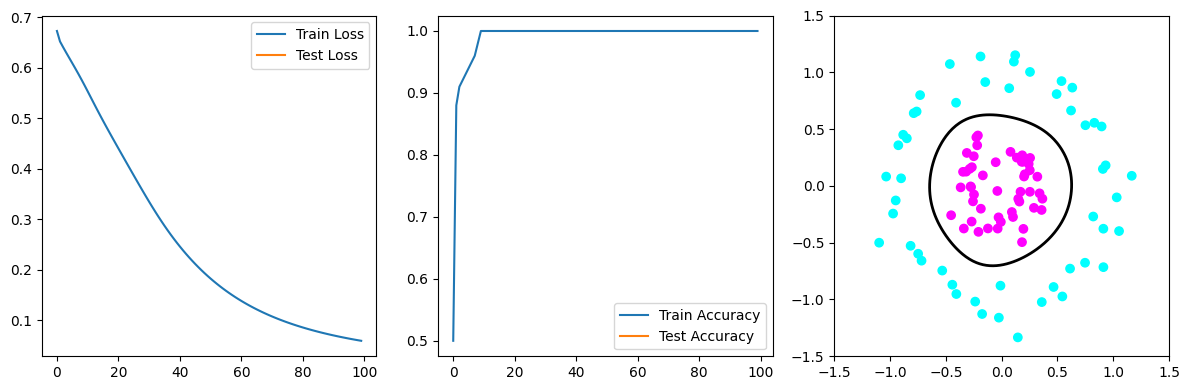

In [15]:
parametrs = neural_network(X, y, (32, 32, 32), learning_rate=0.1, n_iter=1000)

In [ ]:
# Cat and dog classification 

X_train, X_test, y_train, y_test = load_data_large()
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)


12499it [01:14, 167.65it/s]
11431it [01:07, 188.91it/s]c:\Users\remik\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))
12499it [01:14, 167.63it/s]


X_train shape :  (22498, 64, 64, 3)
X_test shape :  (2500, 64, 64, 3)


In [19]:
def preprocess(dataset):
    new = np.zeros((dataset.shape[0], dataset[0].flatten().shape[0]), dtype=float)
    for i in range(len(dataset)):
        new[i] = dataset[i].flatten()
        new[i] = new[i]/250.0
    return new

In [ ]:
# Preprocess and reshape variables

X_train = preprocess(X_train)
X_test = preprocess(X_test)
X_train = X_train.T
X_test = X_test.T

y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

print(X_train.shape)
print(y_train.shape)


(12288, 22498)
(1, 22498)


12288
1
hidden layers :  [12288, 16, 1]


100%|██████████| 1000/1000 [29:13<00:00,  1.75s/it] 


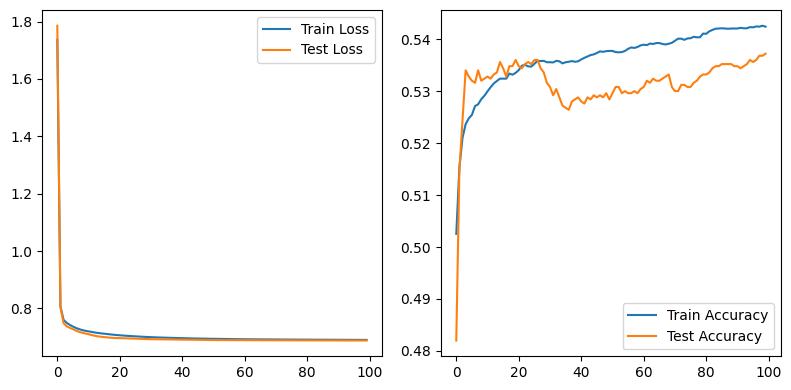

In [21]:
parametrs = neural_network(X_train, X_test, y_train, y_test, (16,), learning_rate=0.1, n_iter=1000)